## Project 3: A Neural Network Classifier, Tuned.

### Part 0: Business Case

Possible business case on some professions which requires information about gender segregation. It can be about the customer, which can shows how the market is and should company have more focus about male or female.
Examples: Customer Service in different companies. 

And yes, we just need the proper data preprocessing, then it would be possible to treat the data with models. But we still need centain amount of features to make sure our prediction is usable, so the hardware requirement is also a thing we need to consider. More features will decrease the model speed and could possibly have a better prediction, then less features will of course increase the speed but could possibly give a bad prediction.

## Part 1: Data Exploration & Preparation -- Revisited

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
data = pd.read_csv("voice.csv")

In [3]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [4]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


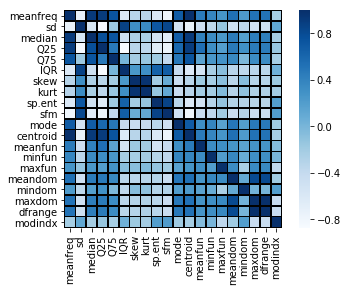

In [6]:
sns.heatmap(data.corr(), linewidths=0.50, vmax=1.0, square=True, cmap="Blues", linecolor='Black')

In [7]:
#NB color only visible when executing inside jupyter notebook not in github 
data.drop(['label'], axis=1).corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.0,-0.72,0.91,0.88,0.71,-0.58,-0.13,-0.21,-0.66,-0.82,0.68,1.0,0.5,0.48,0.46,0.56,0.35,0.57,0.56,-0.28
sd,-0.72,1.0,-0.54,-0.83,-0.13,0.85,-0.069,0.029,0.77,0.87,-0.42,-0.72,-0.49,-0.41,-0.23,-0.48,-0.45,-0.5,-0.49,0.18
median,0.91,-0.54,1.0,0.73,0.72,-0.42,-0.14,-0.22,-0.55,-0.68,0.71,0.91,0.45,0.42,0.43,0.47,0.29,0.47,0.46,-0.25
Q25,0.88,-0.83,0.73,1.0,0.4,-0.86,0.098,0.0031,-0.73,-0.79,0.51,0.88,0.65,0.37,0.32,0.46,0.39,0.48,0.47,-0.18
Q75,0.71,-0.13,0.72,0.4,1.0,0.066,-0.33,-0.36,-0.2,-0.38,0.57,0.71,0.15,0.34,0.44,0.37,0.088,0.34,0.34,-0.23
IQR,-0.58,0.85,-0.42,-0.86,0.066,1.0,-0.28,-0.19,0.69,0.67,-0.28,-0.58,-0.56,-0.23,-0.11,-0.3,-0.41,-0.34,-0.33,0.058
skew,-0.13,-0.069,-0.14,0.098,-0.33,-0.28,1.0,0.98,-0.4,-0.11,-0.31,-0.13,0.12,-0.2,-0.21,-0.3,0.026,-0.25,-0.26,0.04
kurt,-0.21,0.029,-0.22,0.0031,-0.36,-0.19,0.98,1.0,-0.28,-0.0058,-0.38,-0.21,0.046,-0.26,-0.24,-0.35,-0.026,-0.31,-0.31,0.078
sp.ent,-0.66,0.77,-0.55,-0.73,-0.2,0.69,-0.4,-0.28,1.0,0.89,-0.33,-0.66,-0.5,-0.35,-0.21,-0.3,-0.36,-0.34,-0.33,0.29
sfm,-0.82,0.87,-0.68,-0.79,-0.38,0.67,-0.11,-0.0058,0.89,1.0,-0.46,-0.82,-0.46,-0.43,-0.31,-0.45,-0.38,-0.48,-0.47,0.28


### Do we see correlations in feature space? & If any: are they true/justifiable correlations (or anti-correlations)?

Correlation is the statistical relationship between two variables and there are 3 types:
1. Positive Correlation: both variables change in the same direction. (true correlation)
2. Neutral Correlation: No linear relationship in the change of the variables.
3. Negative Correlation: variables change in opposite directions. (anti correlation)

The range of values for the correlation is from -1.0 to 1.0, and the values cannot exceed 1.0 or be less than -1.0. A correlation of -1.0 indicates a perfect negative correlation, and a correlation of 1.0 indicates a perfect positive correlation. Value 0 indicates a perfect neutral correlation, which means there is no linear relationship between these two variables, and it is possible that these variables have a strong curvilinear relationship.

Helping by heatmap and pandas dataframe, we can clearly see all correlations between all features. We can find all three types of correlation in this dataset.

### If so, should -- or could -- we remove/discard features from our work with the NN and kNN models?

As we mentioned above, neutral correlation is when value equal to 0. When value is close to 0, that means there is a weak linear relationship between variables or maybe no linear relationship. <br/>
By look at all values and compare them, we assume that *skew* and *kurt* are the features could possibly remove/discard from the dataset, because the values of correlation between these two features and the rest features are almost all clost to 0, which means they have weak linear relationship between them and the rest features.<br/>
There are still some features that we can remove because their weak linear relationships, such as sd, IQR, sp.ent, sfm and modindx, but they still have decent values of correlation. So remove them may decrease the accuracy of our model, but we can train both them i.e., with these 5 features and without these 5 features, to see which one have the highest accuracy.

### Are there scaling issues w.r.t. feature ratios (fx a=[-.03,0.74], b=[-20000.,9999.])?

Yes, *skew* and *kurt* are way bigger the rest features. If we do not want to remove them from the dataset, we can use MinMaxScaler or StandardScaler from sklearn to scaling the dataset and have a more reliable result. Or we can just remove them and train the rest features, since they are almost not relate to the rest features.

### Highly skewed distributions (mean, standard deviation, skewness, kurtosis ...)?

As we mentioned above, features such as sd, skew, kurt, IQR, sp.ent, sfm and modindx are less relate to the rest of features and meanfreq seems to have decent values of correlation. But it does not mean that we could remove all of them, we only assume to remove *skew* and *kurt* since they are almost not relate to the rest features. 

## Part 2: Model construction

### Part 2.1: k-Nearest Neighbours

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

x_data = data.iloc[:,:-1]
y_data = data['label']

scaler = StandardScaler()
X_data = scaler.fit_transform(x_data)

label = LabelEncoder()
Y_data = label.fit_transform(y_data)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

KNN parameters: <br/>
1. n_neighbours = 3: from the last assignment and proivde the best results.<br/>
2. weights = uniform: All points in each neighborhood are weighted equally. We choose the default value because we can not see anything in this dataset which will make data points weighted different<br/>
3. algorithm = auto: We use the default value - auto algorithm which let model itself to choose the best algorithm.<br/>
4. leaf_size: since the dataset are not big and the improvement of speed does not necessary, so we use the default value<br/>
5. p: we use the default value p, which is p's value for euclidean_distance. <br/>
6. metric = Euclidean: since p is 2, we are using euclidean metric. <br/>
7. n_jobs = None: we keep the default value, since we dont know how much processors we need to run the model<br/>

In [10]:
Knn = KNeighborsClassifier(n_neighbors=3, weights="uniform", algorithm="auto", leaf_size=30, p=2, metric="euclidean", n_jobs=None)

### Part 2.2: Keras Neural Networks

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers

Using TensorFlow backend.


Code up a network similar to the lecture note, we create a 3 layer neural network: <br/>
1. input layer: we use ReLU as the activation function, since we do not have any negative values in the dataset. <br/>
2. dropout layer: we decide to implement dropout rate as 0.2, which means during training process, dropout layer will randomly drops 0.2 of the neuron connecetions to prevent model overfitting. <br/>
3. output layer: we use softmax as the activation function, which means it turns scores aka logits into probabilities. It is frequently used in classifications and  push one result closer to 1 while another closer to 0 <br/>

In [12]:
model = models.Sequential([layers.Dense(20, activation='relu', input_shape=(20,)),
                           layers.Dropout(0.2),
                           layers.Dense(2, activation='softmax')])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 42        
Total params: 462
Trainable params: 462
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Part 3: Model Training and Validation, Hyperparameter Grid Search

### KNN Model

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 80/20 splitting
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

In [16]:
Knn.fit(x_train, y_train)
y_pred = Knn.predict(x_test)
print('Score:', accuracy_score(y_test, y_pred))

Score: 0.9810725552050473


### Neural Network

In [17]:
model.fit(x_train, y_train, epochs = 200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
2534/2534 [==============================] - 0s 152us/step - loss: 0.6595 - acc: 0.6381
Epoch 2/200
2534/2534 [==============================] - 0s 37us/step - loss: 0.3831 - acc: 0.8816
Epoch 3/200
2534/2534 [==============================] - 0s 37us/step - loss: 0.2647 - acc: 0.9234
Epoch 4/200
2534/2534 [==============================] - 0s 33us/step - loss: 0.1995 - acc: 0.9448
Epoch 5/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.1582 - acc: 0.9590
Epoch 6/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.1348 - acc: 0.9609
Epoch 7/200
2534/2534 [==============================] - 0s 34us/step - loss: 0.1272 - acc: 0.9590
Epoch 8/200
2534/2534 [==============================] - 0s 60us/step - loss: 0.1160 - acc: 0.9629
Epoch 9/200
2534/2534 [==============================] - 0s 59us/step - loss: 0.1042 - acc: 0.9680
Epoch 10/200
2534/2534 [==============================] - 0s

2534/2534 [==============================] - 0s 29us/step - loss: 0.0530 - acc: 0.9795
Epoch 81/200
2534/2534 [==============================] - 0s 31us/step - loss: 0.0510 - acc: 0.9830
Epoch 82/200
2534/2534 [==============================] - 0s 29us/step - loss: 0.0514 - acc: 0.9815
Epoch 83/200
2534/2534 [==============================] - 0s 31us/step - loss: 0.0517 - acc: 0.9818
Epoch 84/200
2534/2534 [==============================] - 0s 33us/step - loss: 0.0520 - acc: 0.9830
Epoch 85/200
2534/2534 [==============================] - 0s 33us/step - loss: 0.0529 - acc: 0.9803
Epoch 86/200
2534/2534 [==============================] - 0s 31us/step - loss: 0.0546 - acc: 0.9799
Epoch 87/200
2534/2534 [==============================] - 0s 32us/step - loss: 0.0524 - acc: 0.9811
Epoch 88/200
2534/2534 [==============================] - 0s 33us/step - loss: 0.0514 - acc: 0.9815
Epoch 89/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.0506 - acc: 0.9807
Epoch 90/200


2534/2534 [==============================] - 0s 30us/step - loss: 0.0402 - acc: 0.9842
Epoch 162/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.0353 - acc: 0.9870
Epoch 163/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.0456 - acc: 0.9815
Epoch 164/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.0452 - acc: 0.9826
Epoch 165/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.0385 - acc: 0.9838
Epoch 166/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.0405 - acc: 0.9862
Epoch 167/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.0412 - acc: 0.9846
Epoch 168/200
2534/2534 [==============================] - 0s 37us/step - loss: 0.0431 - acc: 0.9830
Epoch 169/200
2534/2534 [==============================] - 0s 66us/step - loss: 0.0424 - acc: 0.9846
Epoch 170/200
2534/2534 [==============================] - 0s 34us/step - loss: 0.0447 - acc: 0.9842
Epoc

In [18]:
model.evaluate(x_test, y_test)

634/634 [==============================] - 0s 108us/step


[0.06204512508803456, 0.9794952670106376]

Accuracy for both models are petty good because we already scaling the data.

### Experiments

In [19]:
# Curse of dimensionality
data_curse = data.drop(['skew', 'kurt'], axis=1)

In [20]:
xc_data = data_curse.iloc[:,:-1]
yc_data = data_curse['label']

Yc_data = label.fit_transform(yc_data)

In [21]:
xc_train, xc_test, yc_train, yc_test = train_test_split(xc_data, Yc_data, test_size=0.2, random_state=42)

In [22]:
# KNN model
# compare to socre with StandardScaler, it is much lower.
Knn.fit(xc_train, yc_train)
yc_pred = Knn.predict(xc_test)
print('Score:', accuracy_score(yc_test, yc_pred))

Score: 0.805993690851735


In [23]:
# Without the StandardScaler
xf_train, xf_test, yf_train, yf_test = train_test_split(x_data, Y_data, test_size=0.2, random_state=42)

In [24]:
# KNN model
# Score is lowest if we do not scale the dataset and keep those unrelate features.
Knn.fit(xf_train, yf_train)
yf_pred = Knn.predict(xf_test)
print('Score:', accuracy_score(yf_test, yf_pred))

Score: 0.7129337539432177


In [25]:
# Train NN model after remove unrelate features
model_curse = models.Sequential([layers.Dense(20, activation='relu', input_shape=(18,)),
                           layers.Dropout(0.2),
                           layers.Dense(2, activation='softmax')])

In [26]:
model_curse.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
model_curse.fit(xc_train, yc_train, epochs=200)

Epoch 1/200
2534/2534 [==============================] - 0s 129us/step - loss: 1.0086 - acc: 0.5083
Epoch 2/200
2534/2534 [==============================] - 0s 44us/step - loss: 0.7969 - acc: 0.5446
Epoch 3/200
2534/2534 [==============================] - 0s 51us/step - loss: 0.7384 - acc: 0.5600
Epoch 4/200
2534/2534 [==============================] - 0s 48us/step - loss: 0.6960 - acc: 0.5699
Epoch 5/200
2534/2534 [==============================] - 0s 41us/step - loss: 0.6529 - acc: 0.6085
Epoch 6/200
2534/2534 [==============================] - 0s 34us/step - loss: 0.6241 - acc: 0.6626
Epoch 7/200
2534/2534 [==============================] - 0s 52us/step - loss: 0.6062 - acc: 0.6898
Epoch 8/200
2534/2534 [==============================] - 0s 52us/step - loss: 0.5965 - acc: 0.7139
Epoch 9/200
2534/2534 [==============================] - 0s 45us/step - loss: 0.5848 - acc: 0.7190
Epoch 10/200
2534/2534 [==============================] - 0s 43us/step - loss: 0.5707 - acc: 0.7423
Epoch 11

2534/2534 [==============================] - 0s 55us/step - loss: 0.1335 - acc: 0.9570
Epoch 84/200
2534/2534 [==============================] - 0s 45us/step - loss: 0.1286 - acc: 0.9621
Epoch 85/200
2534/2534 [==============================] - 0s 32us/step - loss: 0.1315 - acc: 0.9578
Epoch 86/200
2534/2534 [==============================] - 0s 32us/step - loss: 0.1259 - acc: 0.9657
Epoch 87/200
2534/2534 [==============================] - 0s 58us/step - loss: 0.1228 - acc: 0.9621
Epoch 88/200
2534/2534 [==============================] - 0s 54us/step - loss: 0.1260 - acc: 0.9574
Epoch 89/200
2534/2534 [==============================] - 0s 38us/step - loss: 0.1206 - acc: 0.9625
Epoch 90/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.1192 - acc: 0.9653
Epoch 91/200
2534/2534 [==============================] - 0s 29us/step - loss: 0.1189 - acc: 0.9649
Epoch 92/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.1205 - acc: 0.9629
Epoch 93/200


2534/2534 [==============================] - 0s 30us/step - loss: 0.0985 - acc: 0.9653
Epoch 165/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.0937 - acc: 0.9692
Epoch 166/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.0980 - acc: 0.9669
Epoch 167/200
2534/2534 [==============================] - 0s 31us/step - loss: 0.0897 - acc: 0.9720
Epoch 168/200
2534/2534 [==============================] - 0s 32us/step - loss: 0.0939 - acc: 0.9692
Epoch 169/200
2534/2534 [==============================] - 0s 65us/step - loss: 0.0909 - acc: 0.9704
Epoch 170/200
2534/2534 [==============================] - 0s 38us/step - loss: 0.0958 - acc: 0.9672
Epoch 171/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.0899 - acc: 0.9700
Epoch 172/200
2534/2534 [==============================] - 0s 31us/step - loss: 0.0896 - acc: 0.9720
Epoch 173/200
2534/2534 [==============================] - 0s 34us/step - loss: 0.0873 - acc: 0.9716
Epoc

In [28]:
# Same as KNN model, compare to socre with StandardScaler, it is lower.
model_curse.evaluate(xc_test, yc_test)

634/634 [==============================] - 0s 95us/step


[0.07499230617792449, 0.9716088316794074]

In [29]:
# Train NN model without the StandardScaler and with all features
model_full = models.Sequential([layers.Dense(20, activation='relu', input_shape=(20,)),
                           layers.Dropout(0.2),
                           layers.Dense(2, activation='softmax')])

In [30]:
model_full.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
model_full.fit(xf_train, yf_train, epochs=200)

Epoch 1/200
2534/2534 [==============================] - 0s 135us/step - loss: 2.3286 - acc: 0.4917
Epoch 2/200
2534/2534 [==============================] - 0s 50us/step - loss: 1.1653 - acc: 0.5043
Epoch 3/200
2534/2534 [==============================] - 0s 33us/step - loss: 1.1547 - acc: 0.5083
Epoch 4/200
2534/2534 [==============================] - 0s 33us/step - loss: 1.0016 - acc: 0.5229
Epoch 5/200
2534/2534 [==============================] - 0s 31us/step - loss: 1.0280 - acc: 0.5221
Epoch 6/200
2534/2534 [==============================] - 0s 32us/step - loss: 0.9458 - acc: 0.5414
Epoch 7/200
2534/2534 [==============================] - 0s 31us/step - loss: 0.9767 - acc: 0.5335
Epoch 8/200
2534/2534 [==============================] - 0s 43us/step - loss: 0.8989 - acc: 0.5399
Epoch 9/200
2534/2534 [==============================] - 0s 43us/step - loss: 0.8757 - acc: 0.5612
Epoch 10/200
2534/2534 [==============================] - 0s 49us/step - loss: 0.8452 - acc: 0.5726
Epoch 11

2534/2534 [==============================] - 0s 39us/step - loss: 0.4740 - acc: 0.7830
Epoch 84/200
2534/2534 [==============================] - 0s 40us/step - loss: 0.4597 - acc: 0.7924
Epoch 85/200
2534/2534 [==============================] - 0s 51us/step - loss: 0.4639 - acc: 0.7952
Epoch 86/200
2534/2534 [==============================] - 0s 48us/step - loss: 0.4563 - acc: 0.7916
Epoch 87/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.4496 - acc: 0.8054
Epoch 88/200
2534/2534 [==============================] - 0s 29us/step - loss: 0.4481 - acc: 0.8015
Epoch 89/200
2534/2534 [==============================] - 0s 32us/step - loss: 0.4304 - acc: 0.8153
Epoch 90/200
2534/2534 [==============================] - 0s 34us/step - loss: 0.4406 - acc: 0.8114
Epoch 91/200
2534/2534 [==============================] - 0s 48us/step - loss: 0.4263 - acc: 0.8279
Epoch 92/200
2534/2534 [==============================] - 0s 32us/step - loss: 0.5101 - acc: 0.8086
Epoch 93/200


2534/2534 [==============================] - 0s 31us/step - loss: 0.1913 - acc: 0.9309
Epoch 165/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.1962 - acc: 0.9286
Epoch 166/200
2534/2534 [==============================] - 0s 31us/step - loss: 0.2216 - acc: 0.9203
Epoch 167/200
2534/2534 [==============================] - 0s 36us/step - loss: 0.2140 - acc: 0.9132
Epoch 168/200
2534/2534 [==============================] - 0s 65us/step - loss: 0.2062 - acc: 0.9179
Epoch 169/200
2534/2534 [==============================] - 0s 60us/step - loss: 0.1862 - acc: 0.9282
Epoch 170/200
2534/2534 [==============================] - 0s 51us/step - loss: 0.1917 - acc: 0.9282
Epoch 171/200
2534/2534 [==============================] - 0s 33us/step - loss: 0.1896 - acc: 0.9282
Epoch 172/200
2534/2534 [==============================] - 0s 34us/step - loss: 0.1741 - acc: 0.9325
Epoch 173/200
2534/2534 [==============================] - 0s 34us/step - loss: 0.1807 - acc: 0.9301
Epoc

In [32]:
# Score is lowest if we do not scale the dataset and keep those unrelate features.
model_full.evaluate(xf_test, yf_test)

634/634 [==============================] - 0s 134us/step


[0.12013403690575801, 0.9668769716088328]

In [33]:
male_data = data[data.label !='female']
male_data.shape

(1584, 21)

In [34]:
# remove 60% of the male cases
random_number = 0.6*1584
remove_male = int(random_number)
drop_indices = np.random.choice(male_data.index, remove_male, replace=False)
male_after = male_data.drop(drop_indices)
male_after.shape

(634, 21)

In [35]:
# dataset after removing 60% of male cases
female_data = data[data.label !='male']
unbalanced_data = female_data.append(male_after, ignore_index = True)
unbalanced_data.shape

(2218, 21)

In [36]:
unbalanced_x = unbalanced_data.iloc[:,:-1]
unbalanced_y = unbalanced_data['label']
yun = label.fit_transform(unbalanced_y)

xun_train, xun_test, yun_train, yun_test = train_test_split(unbalanced_x, yun, test_size=0.2, random_state=42)

In [37]:
# It seems like the algorithm is not influenced in any way by the size of the class, 
# it will not favor any on the basis of size. Score seems to be better than full dataset.

Knn.fit(xun_train, yun_train)
yun_pred = Knn.predict(xun_test)
print('Score:', accuracy_score(yun_test, yun_pred))

Score: 0.7635135135135135


In [38]:
# Train NN model with 60% less male
model_unbalanced = models.Sequential([layers.Dense(20, activation='relu', input_shape=(20,)),
                           layers.Dropout(0.2),
                           layers.Dense(2, activation='softmax')])
model_unbalanced.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_unbalanced.fit(xun_train, yun_train, epochs=200)

Epoch 1/200
1774/1774 [==============================] - 0s 230us/step - loss: 1.7784 - acc: 0.5085
Epoch 2/200
1774/1774 [==============================] - 0s 56us/step - loss: 1.2384 - acc: 0.6359
Epoch 3/200
1774/1774 [==============================] - 0s 42us/step - loss: 1.1964 - acc: 0.6274
Epoch 4/200
1774/1774 [==============================] - 0s 36us/step - loss: 1.0734 - acc: 0.6404
Epoch 5/200
1774/1774 [==============================] - 0s 34us/step - loss: 1.0874 - acc: 0.6415
Epoch 6/200
1774/1774 [==============================] - 0s 33us/step - loss: 0.9483 - acc: 0.6483
Epoch 7/200
1774/1774 [==============================] - 0s 31us/step - loss: 0.9193 - acc: 0.6556
Epoch 8/200
1774/1774 [==============================] - 0s 33us/step - loss: 0.9594 - acc: 0.6714
Epoch 9/200
1774/1774 [==============================] - 0s 49us/step - loss: 0.8932 - acc: 0.6623
Epoch 10/200
1774/1774 [==============================] - 0s 44us/step - loss: 0.8062 - acc: 0.6731
Epoch 11

1774/1774 [==============================] - 0s 41us/step - loss: 0.4361 - acc: 0.8292
Epoch 84/200
1774/1774 [==============================] - 0s 34us/step - loss: 0.4226 - acc: 0.8315
Epoch 85/200
1774/1774 [==============================] - 0s 34us/step - loss: 0.3976 - acc: 0.8309
Epoch 86/200
1774/1774 [==============================] - 0s 36us/step - loss: 0.3773 - acc: 0.8253
Epoch 87/200
1774/1774 [==============================] - 0s 31us/step - loss: 0.3778 - acc: 0.8377
Epoch 88/200
1774/1774 [==============================] - 0s 115us/step - loss: 0.3660 - acc: 0.8348
Epoch 89/200
1774/1774 [==============================] - 0s 56us/step - loss: 0.3559 - acc: 0.8281
Epoch 90/200
1774/1774 [==============================] - 0s 37us/step - loss: 0.3499 - acc: 0.8365
Epoch 91/200
1774/1774 [==============================] - 0s 38us/step - loss: 0.3612 - acc: 0.8269
Epoch 92/200
1774/1774 [==============================] - 0s 36us/step - loss: 0.3580 - acc: 0.8258
Epoch 93/200

1774/1774 [==============================] - 0s 39us/step - loss: 0.1832 - acc: 0.9369
Epoch 165/200
1774/1774 [==============================] - 0s 38us/step - loss: 0.1811 - acc: 0.9346
Epoch 166/200
1774/1774 [==============================] - 0s 46us/step - loss: 0.1723 - acc: 0.9386
Epoch 167/200
1774/1774 [==============================] - 0s 54us/step - loss: 0.1668 - acc: 0.9397
Epoch 168/200
1774/1774 [==============================] - 0s 38us/step - loss: 0.1769 - acc: 0.9352
Epoch 169/200
1774/1774 [==============================] - 0s 38us/step - loss: 0.1664 - acc: 0.9436
Epoch 170/200
1774/1774 [==============================] - 0s 41us/step - loss: 0.1574 - acc: 0.9436
Epoch 171/200
1774/1774 [==============================] - 0s 38us/step - loss: 0.1646 - acc: 0.9363
Epoch 172/200
1774/1774 [==============================] - 0s 37us/step - loss: 0.1668 - acc: 0.9363
Epoch 173/200
1774/1774 [==============================] - 0s 38us/step - loss: 0.1576 - acc: 0.9431
Epoc

In [39]:
# It seems like unbalanced dataset will have a impact on score
model_unbalanced.evaluate(xun_test, yun_test)

444/444 [==============================] - 0s 236us/step


[0.1223959785860938, 0.9572072082811648]

In [40]:
# Network topology
# add more layer
model_addlayer = models.Sequential([layers.Dense(20, activation='relu', input_shape=(18,)),
                            layers.Dropout(0.2),
                            layers.Dense(20, activation='relu', input_shape=(18,)),
                            layers.Dense(2, activation='softmax')])
model_addlayer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_addlayer.fit(xc_train, yc_train, epochs=200)

Epoch 1/200
2534/2534 [==============================] - 0s 189us/step - loss: 0.7316 - acc: 0.5233
Epoch 2/200
2534/2534 [==============================] - 0s 36us/step - loss: 0.6742 - acc: 0.5860
Epoch 3/200
2534/2534 [==============================] - 0s 44us/step - loss: 0.6495 - acc: 0.6279
Epoch 4/200
2534/2534 [==============================] - 0s 52us/step - loss: 0.6322 - acc: 0.6448
Epoch 5/200
2534/2534 [==============================] - 0s 38us/step - loss: 0.6123 - acc: 0.6780
Epoch 6/200
2534/2534 [==============================] - 0s 41us/step - loss: 0.5918 - acc: 0.6914
Epoch 7/200
2534/2534 [==============================] - 0s 44us/step - loss: 0.5902 - acc: 0.7048
Epoch 8/200
2534/2534 [==============================] - 0s 39us/step - loss: 0.5628 - acc: 0.7182
Epoch 9/200
2534/2534 [==============================] - 0s 40us/step - loss: 0.5506 - acc: 0.7289
Epoch 10/200
2534/2534 [==============================] - 0s 41us/step - loss: 0.5377 - acc: 0.7478
Epoch 11

2534/2534 [==============================] - 0s 36us/step - loss: 0.1072 - acc: 0.9649
Epoch 84/200
2534/2534 [==============================] - 0s 35us/step - loss: 0.1017 - acc: 0.9649
Epoch 85/200
2534/2534 [==============================] - 0s 34us/step - loss: 0.1000 - acc: 0.9669
Epoch 86/200
2534/2534 [==============================] - 0s 35us/step - loss: 0.0877 - acc: 0.9743
Epoch 87/200
2534/2534 [==============================] - 0s 37us/step - loss: 0.0931 - acc: 0.9692
Epoch 88/200
2534/2534 [==============================] - 0s 35us/step - loss: 0.0981 - acc: 0.9672
Epoch 89/200
2534/2534 [==============================] - 0s 35us/step - loss: 0.0988 - acc: 0.9676
Epoch 90/200
2534/2534 [==============================] - 0s 34us/step - loss: 0.0986 - acc: 0.9649
Epoch 91/200
2534/2534 [==============================] - 0s 34us/step - loss: 0.0970 - acc: 0.9720
Epoch 92/200
2534/2534 [==============================] - 0s 35us/step - loss: 0.0918 - acc: 0.9688
Epoch 93/200


2534/2534 [==============================] - 0s 35us/step - loss: 0.0859 - acc: 0.9704
Epoch 165/200
2534/2534 [==============================] - 0s 34us/step - loss: 0.0773 - acc: 0.9767
Epoch 166/200
2534/2534 [==============================] - 0s 35us/step - loss: 0.0831 - acc: 0.9755
Epoch 167/200
2534/2534 [==============================] - 0s 35us/step - loss: 0.0823 - acc: 0.9732
Epoch 168/200
2534/2534 [==============================] - 0s 35us/step - loss: 0.0846 - acc: 0.9728
Epoch 169/200
2534/2534 [==============================] - 0s 34us/step - loss: 0.0828 - acc: 0.9743
Epoch 170/200
2534/2534 [==============================] - 0s 34us/step - loss: 0.0754 - acc: 0.9743
Epoch 171/200
2534/2534 [==============================] - 0s 35us/step - loss: 0.0833 - acc: 0.9692
Epoch 172/200
2534/2534 [==============================] - 0s 35us/step - loss: 0.0843 - acc: 0.9743
Epoch 173/200
2534/2534 [==============================] - 0s 36us/step - loss: 0.0848 - acc: 0.9712
Epoc

In [41]:
# seems like the accuracy is improved ([0.05990686108966355, 0.9826498422712934])
model_addlayer.evaluate(xc_test, yc_test)

634/634 [==============================] - 0s 161us/step


[0.05834942615417652, 0.9810725552050473]

We had test:
1. an additional hidden layer will increased accuracy of the model
2. reduced the number of neurons on input layer will decreased accuracy of the model
3. increase the number of neurons on hidden layer will get a better accuracy for the model

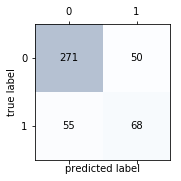

In [42]:
# Confusion matrix for Knn_unbalanced
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=yun_test, y_pred=yun_pred)

def display_confusion(confmat):       
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i,
                    s=confmat[i, j],
                    va='center', ha='center')            
            plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()
    
display_confusion(confmat)

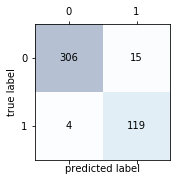

In [43]:
yunN_pred = model_unbalanced.predict(xun_test)
yunN_pred = np.argmax(yunN_pred, axis=1)
matrix = confusion_matrix(y_true=yun_test, y_pred=yunN_pred)
display_confusion(matrix)

The confusion matrix for both KNN and NN clearly show the dataset is unbalanced. Since the dataset is unbalanced we will prefere Precision Recall curve as opposed to ROC curve

f1=0.926 auc=0.984 ap=0.983


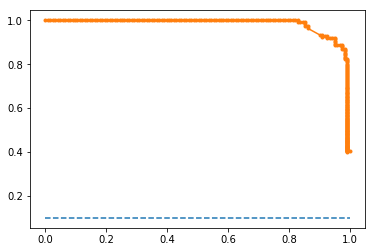

In [44]:
# using PR curve for validating NN model
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

probs = model_unbalanced.predict_proba(xun_test)
probs = probs[:, 1]

precision, recall, thresholds = precision_recall_curve(yun_test, probs)
f1 = f1_score(yun_test, yunN_pred)
auc = auc(recall, precision)
ap = average_precision_score(yun_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
plt.plot([0, 1], [0.1, 0.1], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

A classifier with the perfect performance level of PR curve shows a combination of two straight lines – from the top left corner (0.0, 1.0) to the top right corner (1.0, 1.0) and further down to the end point. In this case, the lines in the graph are nearly to match the perfect performance level, which indicate high accuracy of model.

In [45]:
# Hyperparameter GridSearch
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

grid.fit(xun_train,yun_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:
print(grid.best_params_, "and the score is" , grid.best_score_)

{'n_neighbors': 6} and the score is 0.7553551296505073


### Part 4: The 5 feature challenge

In [47]:
# using the scaling dataset
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(x_train)
print(pca.explained_variance_ratio_)

[0.45579325 0.1176069  0.10789304 0.07557746 0.05365407]


In [48]:
print(pca.singular_values_)

[152.13427761  77.27865214  74.01842716  61.94970909  52.19686951]


In [49]:
print(pca.components_)

[[-0.31270713  0.28032636 -0.27726102 -0.30292873 -0.18857697  0.24048449
   0.13203101  0.1328722   0.22131172  0.27348492 -0.24214435 -0.31270713
  -0.18032741 -0.15463869 -0.11499858 -0.22918616 -0.08423427 -0.23430501
  -0.23286464  0.08897103]
 [ 0.03591734 -0.19849837  0.00592209  0.15701646 -0.18323762 -0.27990339
   0.34761698  0.28713577 -0.37589703 -0.24031254 -0.12351932  0.03591734
   0.12948846 -0.07930893 -0.22513861 -0.2564469   0.28783858 -0.28661083
  -0.2918779   0.11881827]
 [ 0.00872982  0.10752729  0.03746523 -0.08600983  0.12894892  0.16911353
   0.4792426   0.50272788 -0.17969616 -0.090237   -0.08701056  0.00872982
  -0.02794561 -0.01333247  0.25944682  0.07197508 -0.2386062   0.17666442
   0.18101126 -0.45769399]
 [-0.25001218 -0.20517571 -0.34873314 -0.06074345 -0.5526145  -0.23622517
  -0.01386583 -0.04494284 -0.12193634 -0.01740112 -0.13801562 -0.25001218
   0.12261457  0.04253972  0.01284098  0.26296134  0.08785158  0.3271317
   0.32565576 -0.05501923]
 [-0.